# 지역 총부가가치 데이터 정제

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
# 한글 폰트를 지정해주기 위해 필요한 명령어
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/MALGUN.TTF").get_name()
rc('font', family=font_name)
%matplotlib inline

In [7]:
rawDf = pd.read_excel('./data/value/report.xls')
rawDf

,기간,자치구,경제활동별,산출액(①),중간소비(②),지역내 총부가가치(③=①-②),고정자본소모(④),순기타 생산세(⑤),지역내 요소소득(⑥=③-④-⑤),산출액(2010년 기준년가격),지역내총부가가치(2010년 기준년가격)
0,2010,서울시,소계,526988986,264248378,262740608,40532331,3660290,218547987,526988986,262740608
1,2010,서울시,농림어업,1144578,621198,523380,63003,20198,440179,1144578,523380
2,2010,서울시,광업,220474,69315,151159,18401,248,132510,220474,151159
3,2010,서울시,제조업,59602261,44146581,15455680,2928462,240884,12286334,59602261,15455680
4,2010,서울시,전기 가스 증기 및 수도사업,7644311,6052830,1591481,800817,16984,773680,7644311,1591481
5,2010,서울시,건설업,25436028,17467149,7968879,719865,87762,7161252,25436028,7968879
6,2010,서울시,도소매업,86901682,41774629,45127053,3033863,414078,41679112,86901682,45127053
7,2010,서울시,운수업,22651817,14258225,8393592,2327036,167781,5898775,22651817,8393592
8,2010,서울시,숙박 및 음식점업,22341688,13323347,9018341,795090,114549,8108702,22341688,9018341
9,2010,서울시,정보 및 통신업,58040789,31015233,27025556,8656897,45840,18322819,58040789,27025556


In [6]:
df[(df['자치구'] == '광진구') & (df['경제활동별'] == '숙박 및 음식점업')]

,기간,자치구,경제활동별,산출액(①),중간소비(②),지역내 총부가가치(③=①-②),고정자본소모(④),순기타 생산세(⑤),지역내 요소소득(⑥=③-④-⑤),산출액(2010년 기준년가격),지역내총부가가치(2010년 기준년가격)
91,2010,광진구,숙박 및 음식점업,948078,534286,413792,64196,4861,344735,948078,413792
521,2011,광진구,숙박 및 음식점업,968815,572529,396285,59720,4926,331640,922682,380307
952,2012,광진구,숙박 및 음식점업,984600,575456,409144,59885,5195,344064,909237,373985
1384,2013,광진구,숙박 및 음식점업,1049033,607533,441499,69589,5511,366399,951403,401259
1814,2014,광진구,숙박 및 음식점업,1029612,596777,432836,66608,5635,360593,919493,382851
2246,2015,광진구,숙박 및 음식점업,991981,563409,428572,60693,5737,362142,867201,352170


In [8]:
def selectGu(data, gu):
    df = data[(data['자치구'] == gu) & (data['경제활동별'] == '숙박 및 음식점업')]
    tmpIndex = np.arange(len(df))
    df.set_index(tmpIndex, inplace=True)
    
    return df

In [9]:
gwangjin = selectGu(rawDf, '광진구')
gangnam = selectGu(rawDf, '강남구')
mapo = selectGu(rawDf, '마포구')
seongdong = selectGu(rawDf, '성동구')

In [10]:
gwangjin

,기간,자치구,경제활동별,산출액(①),중간소비(②),지역내 총부가가치(③=①-②),고정자본소모(④),순기타 생산세(⑤),지역내 요소소득(⑥=③-④-⑤),산출액(2010년 기준년가격),지역내총부가가치(2010년 기준년가격)
0,2010,광진구,숙박 및 음식점업,948078,534286,413792,64196,4861,344735,948078,413792
1,2011,광진구,숙박 및 음식점업,968815,572529,396285,59720,4926,331640,922682,380307
2,2012,광진구,숙박 및 음식점업,984600,575456,409144,59885,5195,344064,909237,373985
3,2013,광진구,숙박 및 음식점업,1049033,607533,441499,69589,5511,366399,951403,401259
4,2014,광진구,숙박 및 음식점업,1029612,596777,432836,66608,5635,360593,919493,382851
5,2015,광진구,숙박 및 음식점업,991981,563409,428572,60693,5737,362142,867201,352170


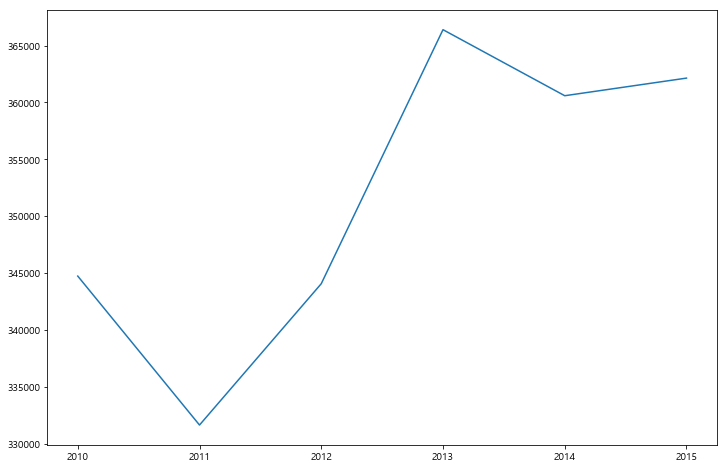

In [12]:
plt.figure(figsize=(12,8))
plt.plot(gwangjin.기간, gwangjin.T.iloc[8])
plt.show()

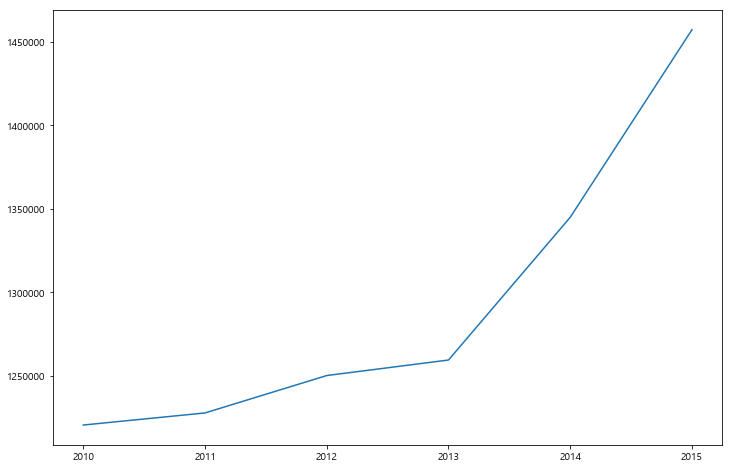

In [13]:
plt.figure(figsize=(12,8))
plt.plot(gangnam.기간, gangnam.T.iloc[8])
plt.show()

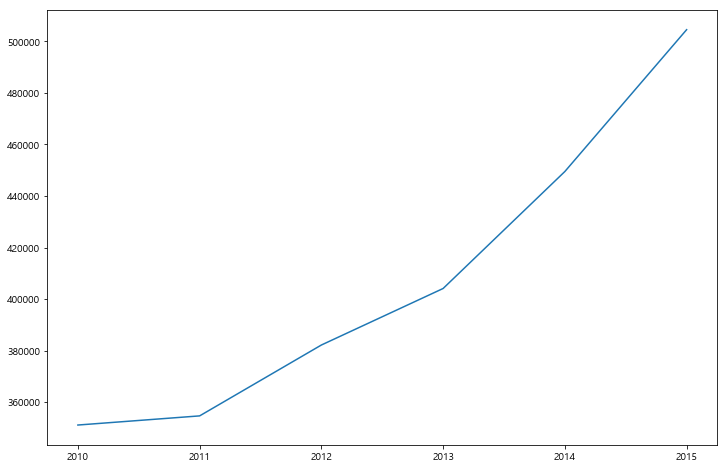

In [14]:
plt.figure(figsize=(12,8))
plt.plot(mapo.기간, mapo.T.iloc[8])
plt.show()

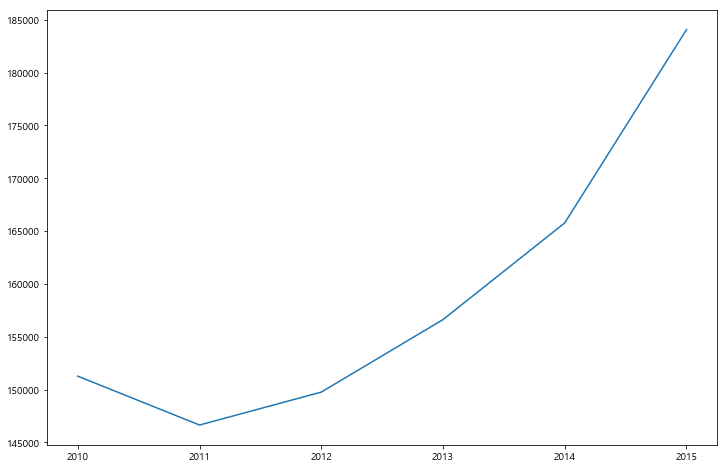

In [15]:
plt.figure(figsize=(12,8))
plt.plot(seongdong.기간, seongdong.T.iloc[8])
plt.show()

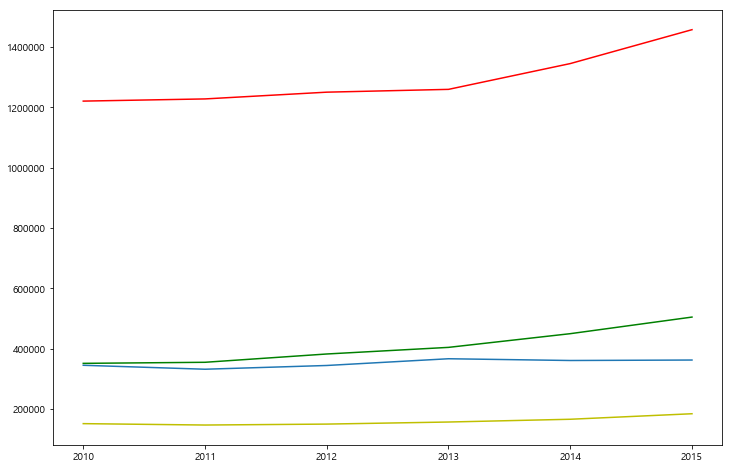

In [16]:
plt.figure(figsize=(12,8))
plt.plot(gwangjin.기간, gwangjin.T.iloc[8])
plt.plot(gangnam.기간, gangnam.T.iloc[8], 'r')
plt.plot(mapo.기간, mapo.T.iloc[8], 'g')
plt.plot(seongdong.기간, seongdong.T.iloc[8], 'y')
plt.show()

In [18]:
gwangjin.to_csv('./data/value/gwangjinValue.csv', encoding='utf-8-sig')
gangnam.to_csv('./data/value/gangnamValue.csv', encoding='utf-8-sig')
mapo.to_csv('./data/value/mapoValue.csv', encoding='utf-8-sig')
seongdong.to_csv('./data/value/seongdonValue.csv', encoding='utf-8-sig')

In [19]:
totalValue = pd.DataFrame()
totalValue = pd.concat([gangnam, gwangjin])
totalValue = pd.concat([totalValue, mapo])
totalValue = pd.concat([totalValue, seongdong])
totalValue

,기간,자치구,경제활동별,산출액(①),중간소비(②),지역내 총부가가치(③=①-②),고정자본소모(④),순기타 생산세(⑤),지역내 요소소득(⑥=③-④-⑤),산출액(2010년 기준년가격),지역내총부가가치(2010년 기준년가격)
0,2010,강남구,숙박 및 음식점업,3361671,1982742,1378930,141156,17236,1220538,3361671,1378930
1,2011,강남구,숙박 및 음식점업,3630550,2247656,1382893,136658,18459,1227776,3461121,1333559
2,2012,강남구,숙박 및 음식점업,3683679,2274781,1408898,139281,19437,1250180,3426961,1313145
3,2013,강남구,숙박 및 음식점업,3652411,2241157,1411255,132592,19189,1259474,3346748,1284865
4,2014,강남구,숙박 및 음식점업,3859263,2343171,1516092,150002,21120,1344970,3475673,1338630
5,2015,강남구,숙박 및 음식점업,4009494,2373920,1635574,155070,23187,1457318,3534918,1344180
0,2010,광진구,숙박 및 음식점업,948078,534286,413792,64196,4861,344735,948078,413792
1,2011,광진구,숙박 및 음식점업,968815,572529,396285,59720,4926,331640,922682,380307
2,2012,광진구,숙박 및 음식점업,984600,575456,409144,59885,5195,344064,909237,373985
3,2013,광진구,숙박 및 음식점업,1049033,607533,441499,69589,5511,366399,951403,401259


In [20]:
tmp = np.arange(len(totalValue))
totalValue.set_index(tmp, inplace=True)
totalValue

,기간,자치구,경제활동별,산출액(①),중간소비(②),지역내 총부가가치(③=①-②),고정자본소모(④),순기타 생산세(⑤),지역내 요소소득(⑥=③-④-⑤),산출액(2010년 기준년가격),지역내총부가가치(2010년 기준년가격)
0,2010,강남구,숙박 및 음식점업,3361671,1982742,1378930,141156,17236,1220538,3361671,1378930
1,2011,강남구,숙박 및 음식점업,3630550,2247656,1382893,136658,18459,1227776,3461121,1333559
2,2012,강남구,숙박 및 음식점업,3683679,2274781,1408898,139281,19437,1250180,3426961,1313145
3,2013,강남구,숙박 및 음식점업,3652411,2241157,1411255,132592,19189,1259474,3346748,1284865
4,2014,강남구,숙박 및 음식점업,3859263,2343171,1516092,150002,21120,1344970,3475673,1338630
5,2015,강남구,숙박 및 음식점업,4009494,2373920,1635574,155070,23187,1457318,3534918,1344180
6,2010,광진구,숙박 및 음식점업,948078,534286,413792,64196,4861,344735,948078,413792
7,2011,광진구,숙박 및 음식점업,968815,572529,396285,59720,4926,331640,922682,380307
8,2012,광진구,숙박 및 음식점업,984600,575456,409144,59885,5195,344064,909237,373985
9,2013,광진구,숙박 및 음식점업,1049033,607533,441499,69589,5511,366399,951403,401259


In [21]:
totalValue.to_csv('./data/value/totalValue.csv', encoding='utf-8-sig')